<a href="https://colab.research.google.com/github/MorningStarTM/Machine_Learning_Examples/blob/main/tomato_plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import io
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from glob import glob

In [2]:
train_path = "/content/drive/MyDrive/DataSet/tomato/train"
test_path = "/content/drive/MyDrive/DataSet/tomato/val"

In [3]:
#shape of image
IMAGE_SIZE = [224, 224]

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [5]:
#freeze training existing layer
for layer in vgg.layers:
  layer.trainable = False

In [6]:
folders = glob("/content/drive/MyDrive/DataSet/tomato/train/*")

In [7]:
#build our layers
x = Flatten()(vgg.output)

In [8]:
#set last layer
prediction_layer = Dense(len(folders), activation='softmax' )(x)
#declare the model
model = Model(inputs=vgg.input, outputs=prediction_layer)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##Preparing Dataset

In [11]:
train_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_gen.flow_from_directory(train_path, target_size=(224, 224), batch_size=16, class_mode='categorical')

Found 10026 images belonging to 10 classes.


In [13]:
testing_set = test_gen.flow_from_directory(test_path, target_size=(224,224), batch_size=16, class_mode='categorical')

Found 853 images belonging to 10 classes.


In [14]:
imgs, labels = next(training_set)

In [15]:
#View images
def Plot_img(imgs):
  fig, ax = plt.subplots(1,16, figsize=(20,20))
  ax = ax.flatten()
  for img, axes in zip(imgs, ax):
    axes.imshow(img)
    axes.axis('off')
  plt.tight_layout()
  plt.show()

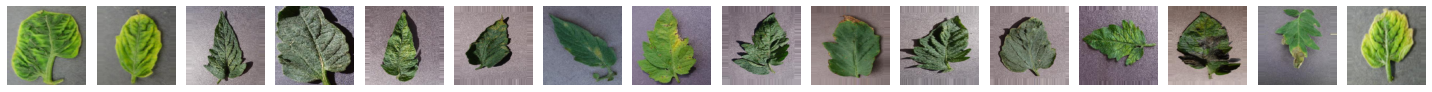

In [16]:
Plot_img(imgs)

##Train the model

In [17]:
r = model.fit(training_set, epochs=10, validation_data=testing_set, steps_per_epoch=len(training_set), validation_steps=len(testing_set))

Epoch 1/10
627/627 [==============================] - 6665s 11s/step - loss: 0.8828 - accuracy: 0.7109 - val_loss: 1.0615 - val_accuracy: 0.6987
Epoch 2/10
627/627 [==============================] - 142s 226ms/step - loss: 0.5534 - accuracy: 0.8274 - val_loss: 0.8856 - val_accuracy: 0.7550
Epoch 3/10
627/627 [==============================] - 140s 223ms/step - loss: 0.4570 - accuracy: 0.8601 - val_loss: 0.7716 - val_accuracy: 0.8007
Epoch 4/10
627/627 [==============================] - 142s 226ms/step - loss: 0.4113 - accuracy: 0.8730 - val_loss: 0.9791 - val_accuracy: 0.7585
Epoch 5/10
627/627 [==============================] - 139s 222ms/step - loss: 0.3637 - accuracy: 0.8860 - val_loss: 1.0919 - val_accuracy: 0.7515
Epoch 6/10
627/627 [==============================] - 140s 223ms/step - loss: 0.3436 - accuracy: 0.8977 - val_loss: 0.9297 - val_accuracy: 0.7902
Epoch 7/10
627/627 [==============================] - 139s 221ms/step - loss: 0.2974 - accuracy: 0.9079 - val_loss: 1.2462 - 

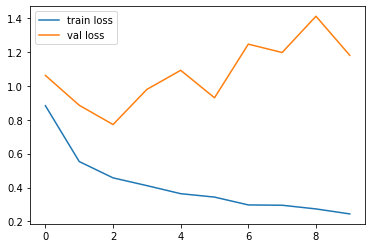

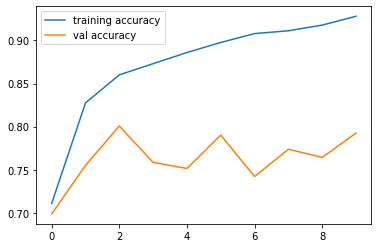

In [18]:
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="val loss")
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label="training accuracy")
plt.plot(r.history['val_accuracy'], label="val accuracy")
plt.legend()
plt.show()

In [19]:
#save model
model.save('/content/drive/MyDrive/CNN_Models/vgg_for_tomato_leaves_disease_detection.h5')

##Prediction

In [20]:
from tensorflow.keras.preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.models import load_model

In [21]:
bacteria_img = "/content/drive/MyDrive/DataSet/tomato/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"
lateblind_img = "/content/drive/MyDrive/DataSet/tomato/train/Tomato___Late_blight/01425d17-4c97-46e3-b395-c1453b78ab78___GHLB2 Leaf 9100.JPG"
mossaic_img = "/content/drive/MyDrive/DataSet/tomato/train/Tomato___Tomato_mosaic_virus/006e354b-c054-4b72-a83c-e3feb038942e___PSU_CG 2330.JPG"

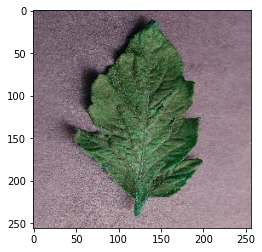

In [40]:
img = cv2.imread(mossaic_img)
plt.imshow(img)

In [32]:
test_image = load_img(mossaic_img, target_size = (224, 224))

In [33]:
test_image = img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image).round(3)

1/1 [==============================] - 0s 20ms/step


In [34]:
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [35]:
pred = np.argmax(result)

In [36]:
pred

8